* Created By: Blessy Louis (2348416) 4MDS'B'
* Created On : 30.08.2024

## **Lab Exercise 6:**
* Subgraph Patterns: Identify meaningful subgraphs (triangles, etc.) in a network. Analyze their distribution and link them to network properties


## **Transportation and logistics**

# **Import Libraries**



The `import pandas as pd` statement imports the Pandas library under the alias `pd`, allowing Python code to use Pandas functions and classes. Pandas is a powerful data manipulation and analysis library in Python, providing data structures like DataFrame and Series for handling structured data efficiently.

`import networkx as nx` imports the NetworkX library under the alias `nx`. NetworkX is a Python package for the creation, manipulation, and study of complex networks of nodes and edges. It offers tools for analyzing network structures, computing network properties, and performing graph algorithms.

`import matplotlib.pyplot as plt` imports the Pyplot module from the Matplotlib library under the alias `plt`. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Pyplot provides a MATLAB-like plotting interface, making it easy to generate various types of plots such as line plots, histograms, scatter plots, etc.




In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

##**Data Description**
# **Souce:**https://www.kaggle.com/code/sasakitetsuya/indian-cities-network-analysis/input

This CSV file contains three features: Origin city, Destination city and Distance between them (via road). It can be used for a wide range of path/route-finding programs.

* Origin: This column specifies the origin (start) city.
* Destination: This column specifies the destination (final) city.
* Distance: This column contains round off distance (in km) between the Origin and Destination cities.

In [ ]:
# Step 1: Load the dataset
df = pd.read_csv('indian-cities-dataset.csv')
print("Unique Values Origin",df['Origin'].unique())
print("Unique Values of Destination",df['Destination'].unique())
print("Head of the dataset",df.head())

Unique Values Origin ['Agra' 'Ahmedabad' 'Bengaluru' 'Bhubaneswar' 'Chennai' 'Delhi' 'Goa'
 'Hyderabad' 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Mumbai'
 'Patna' 'Pune' 'Udaipur' 'Varanasi' 'Vishakhapatnam']
Unique Values of Destination ['Delhi' 'Lucknow' 'Kanpur' 'Mumbai' 'Pune' 'Jaipur' 'Udaipur' 'Hyderabad'
 'Chennai' 'Goa' 'Kolkata' 'Vishakhapatnam' 'Patna' 'Bengaluru' 'Kochi'
 'Agra' 'Thiruvananthapuram' 'Ahmedabad' 'Varanasi' 'Bhubaneswar']
Head of the dataset       Origin Destination  Distance
0       Agra       Delhi       240
1       Agra     Lucknow       334
2       Agra      Kanpur       277
3  Ahmedabad      Mumbai       526
4  Ahmedabad        Pune       663


In [ ]:
df.shape

(83, 3)

In [ ]:
df.isnull().sum()

Origin         0
Destination    0
Distance       0
dtype: int64

In [ ]:

# Step 1: Create the graph
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in df.iterrows():
    origin = row['Origin']
    destination = row['Destination']
    distance = row['Distance']

    # Add nodes
    G.add_node(origin)
    G.add_node(destination)

    # Add edge with distance as weight
    G.add_edge(origin, destination, weight=distance)

### Graph Architecture

**1. Nodes**:
- Represent cities.
- Each unique city from the `Origin` and `Destination` columns in the dataset becomes a node in the graph.

**2. Edges**:
- Represent road connections between cities.
- Each row in the dataset defines an edge between two nodes (cities).
- The `Distance` column specifies the weight of the edge, indicating the road distance between the two cities.

### Conversion Process

1. **Initialize Graph**:
   - Use an undirected graph structure (`nx.Graph()`).

2. **Add Nodes**:
   - Extract city names from both `Origin` and `Destination` columns.
   - Add each city as a node in the graph.

3. **Add Edges**:
   - For each row, create an edge between the `Origin` and `Destination` nodes.
   - Use the `Distance` value as the weight of the edge.

**Summary**: The dataset is converted into a graph where nodes are cities and edges are road connections with distances as weights.

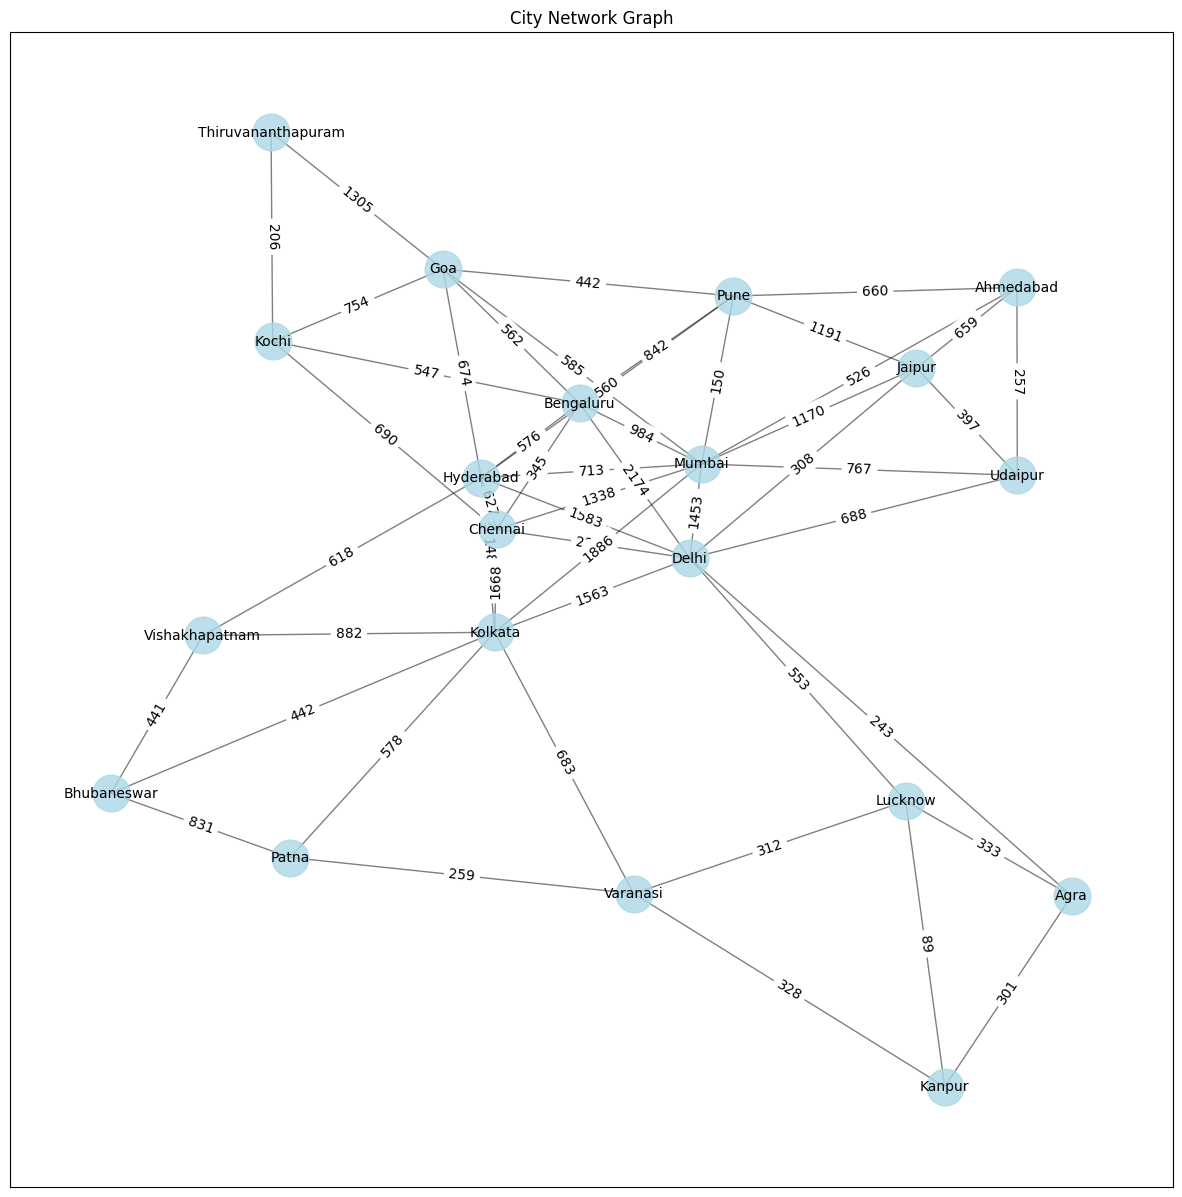

In [ ]:
# Step 2: Visualize the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.5)  # Adjust 'k' for layout

# Draw the graph with edge labels for distances
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Draw edge labels for distances
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("City Network Graph")
plt.show()

1. Finding Triangles (3-Cycles)

In [ ]:
triangles = [cycle for cycle in nx.cycle_basis(G) if len(cycle) == 3]
print(f"Triangles (3-Cycles) in the network: {triangles}")

Triangles (3-Cycles) in the network: [['Kanpur', 'Lucknow', 'Varanasi'], ['Agra', 'Delhi', 'Lucknow'], ['Jaipur', 'Udaipur', 'Delhi'], ['Mumbai', 'Udaipur', 'Delhi'], ['Mumbai', 'Ahmedabad', 'Udaipur'], ['Jaipur', 'Ahmedabad', 'Udaipur'], ['Jaipur', 'Pune', 'Ahmedabad'], ['Mumbai', 'Pune', 'Ahmedabad'], ['Bengaluru', 'Goa', 'Pune'], ['Hyderabad', 'Goa', 'Pune'], ['Mumbai', 'Goa', 'Pune'], ['Kochi', 'Thiruvananthapuram', 'Goa'], ['Bengaluru', 'Kochi', 'Goa'], ['Bengaluru', 'Hyderabad', 'Delhi'], ['Chennai', 'Hyderabad', 'Delhi'], ['Mumbai', 'Hyderabad', 'Delhi'], ['Kolkata', 'Hyderabad', 'Delhi'], ['Kolkata', 'Vishakhapatnam', 'Hyderabad'], ['Kolkata', 'Bhubaneswar', 'Vishakhapatnam'], ['Chennai', 'Mumbai', 'Delhi'], ['Jaipur', 'Mumbai', 'Delhi'], ['Bengaluru', 'Mumbai', 'Delhi'], ['Kolkata', 'Mumbai', 'Delhi'], ['Chennai', 'Bengaluru', 'Delhi'], ['Kolkata', 'Chennai', 'Delhi'], ['Kanpur', 'Agra', 'Lucknow'], ['Kolkata', 'Patna', 'Varanasi']]


The identified triangles (3-cycles) in your network represent tightly connected groups of cities, indicating strong regional ties. For example, cities like Kanpur-Lucknow-Varanasi and Agra-Delhi-Lucknow form natural clusters, highlighting robust connectivity in Northern India. Similarly, Mumbai forms several triangles with cities like Udaipur, Ahmedabad, and Pune, emphasizing strong connections in Western India. The presence of multiple triangles involving major cities like Delhi and Mumbai suggests key hubs that facilitate inter-city travel and communication, reflecting the network's overall structure and regional integration.

2. Finding 4-Cycles (Quadrilaterals)

In [ ]:
four_cycles = [cycle for cycle in nx.cycle_basis(G) if len(cycle) == 4]
print(f"4-Cycles (Quadrilaterals) in the network: {four_cycles}")

4-Cycles (Quadrilaterals) in the network: [['Kolkata', 'Delhi', 'Lucknow', 'Varanasi']]


The identified 4-cycle (quadrilateral) in your network, consisting of Kolkata, Delhi, Lucknow, and Varanasi, represents a set of four cities where each city is directly connected to two others, forming a closed loop. This configuration indicates strong interconnections between these major cities, particularly in Northern and Eastern India, with Delhi acting as a central hub. This quadrilateral reflects a broader regional connectivity, likely facilitating efficient transportation and communication between these important urban centers.

3. Finding Cliques of size 3 or larger

In [ ]:
cliques = [clique for clique in nx.find_cliques(G) if len(clique) >= 3]
print(f"Cliques in the network: {cliques}")

Cliques in the network: [['Kanpur', 'Lucknow', 'Varanasi'], ['Kanpur', 'Lucknow', 'Agra'], ['Vishakhapatnam', 'Kolkata', 'Bhubaneswar'], ['Vishakhapatnam', 'Kolkata', 'Hyderabad'], ['Lucknow', 'Delhi', 'Agra'], ['Thiruvananthapuram', 'Goa', 'Kochi'], ['Patna', 'Kolkata', 'Varanasi'], ['Patna', 'Kolkata', 'Bhubaneswar'], ['Kochi', 'Bengaluru', 'Goa'], ['Kochi', 'Bengaluru', 'Chennai'], ['Mumbai', 'Pune', 'Ahmedabad', 'Jaipur'], ['Mumbai', 'Pune', 'Goa', 'Bengaluru', 'Hyderabad'], ['Mumbai', 'Ahmedabad', 'Udaipur', 'Jaipur'], ['Mumbai', 'Delhi', 'Udaipur', 'Jaipur'], ['Mumbai', 'Delhi', 'Chennai', 'Hyderabad', 'Kolkata'], ['Mumbai', 'Delhi', 'Chennai', 'Hyderabad', 'Bengaluru']]


The identified cliques in your network highlight densely connected city groups. Smaller cliques like Kanpur-Lucknow-Varanasi and Patna-Kolkata-Bhubaneswar show tight regional ties, while larger cliques, such as Mumbai-Delhi-Chennai-Hyderabad-Bengaluru, indicate significant interconnectivity among major urban centers. These cliques reflect strong regional integration and efficient connectivity within these groups, suggesting well-established transportation and communication networks.

4. Calculate the Clustering Coefficient

In [ ]:
clustering_coeff = nx.clustering(G)
average_clustering_coeff = nx.average_clustering(G)
print(f"Clustering Coefficient for each node: {clustering_coeff}")
print(f"Average Clustering Coefficient of the network: {average_clustering_coeff}")


Clustering Coefficient for each node: {'Agra': 0.6666666666666666, 'Delhi': 0.3611111111111111, 'Lucknow': 0.5, 'Kanpur': 0.6666666666666666, 'Ahmedabad': 0.8333333333333334, 'Mumbai': 0.4666666666666667, 'Pune': 0.6, 'Jaipur': 0.7, 'Udaipur': 0.8333333333333334, 'Bengaluru': 0.6190476190476191, 'Hyderabad': 0.5357142857142857, 'Chennai': 0.6666666666666666, 'Goa': 0.5333333333333333, 'Bhubaneswar': 0.6666666666666666, 'Kolkata': 0.35714285714285715, 'Vishakhapatnam': 0.6666666666666666, 'Patna': 0.6666666666666666, 'Kochi': 0.5, 'Thiruvananthapuram': 1.0, 'Varanasi': 0.3333333333333333}
Average Clustering Coefficient of the network: 0.6086507936507937


The clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. It provides insight into the local density of connections in a network. Let's interpret the clustering coefficients you provided:

### **Clustering Coefficient for Each Node:**

- **High Clustering Coefficients (e.g., `1.0`, `0.833`, `0.7`)**:
  - **Nodes**: Thiruvananthapuram (`1.0`), Udaipur (`0.833`), Ahmedabad (`0.833`), Jaipur (`0.7`).
  - **Interpretation**: These cities are part of dense clusters, meaning that many of their neighboring cities are also directly connected to each other. For example, Thiruvananthapuram has a coefficient of `1.0`, indicating that all of its neighbors are fully interconnected, forming a complete subgraph (or clique).

- **Moderate Clustering Coefficients (e.g., `0.6`, `0.5`, `0.4`)**:
  - **Nodes**: Pune (`0.6`), Hyderabad (`0.536`), Bengaluru (`0.619`), Kochi (`0.5`), Delhi (`0.361`).
  - **Interpretation**: These cities are part of moderately dense clusters, where some of their neighboring cities are interconnected, but not all. For instance, Delhi with a coefficient of `0.361` suggests that only a small proportion of its neighbors are interconnected.

- **Lower Clustering Coefficients (e.g., `0.33`, `0.35`)**:
  - **Nodes**: Varanasi (`0.333`), Kolkata (`0.357`).
  - **Interpretation**: These cities are part of less dense clusters, where very few or none of their neighbors are interconnected. Varanasi and Kolkata, with coefficients below `0.4`, indicate that they are part of a sparse network with minimal local clustering.

### **Average Clustering Coefficient of the Network: `0.609`**

- **Interpretation**:
  - The average clustering coefficient of `0.609` indicates that, on average, about 60.9% of a city's neighboring cities are also interconnected. This suggests that the overall network has a moderate level of clustering, where there are some tightly knit groups of cities, but it's not uniformly dense.

### **Overall Implications:**

- **High Clustering**: Cities with high clustering coefficients are likely central in their regions, with many strong local connections. They might serve as regional hubs with robust infrastructure supporting inter-city travel or communication.
- **Low Clustering**: Cities with lower clustering coefficients may be more peripheral, with fewer interconnections among their neighboring cities, possibly indicating geographical or infrastructural challenges that prevent tighter integration.
  
The average clustering coefficient provides a general idea of how interconnected the network is, with `0.609` suggesting a reasonably well-connected network with some areas of higher clustering.

 5. Visualization

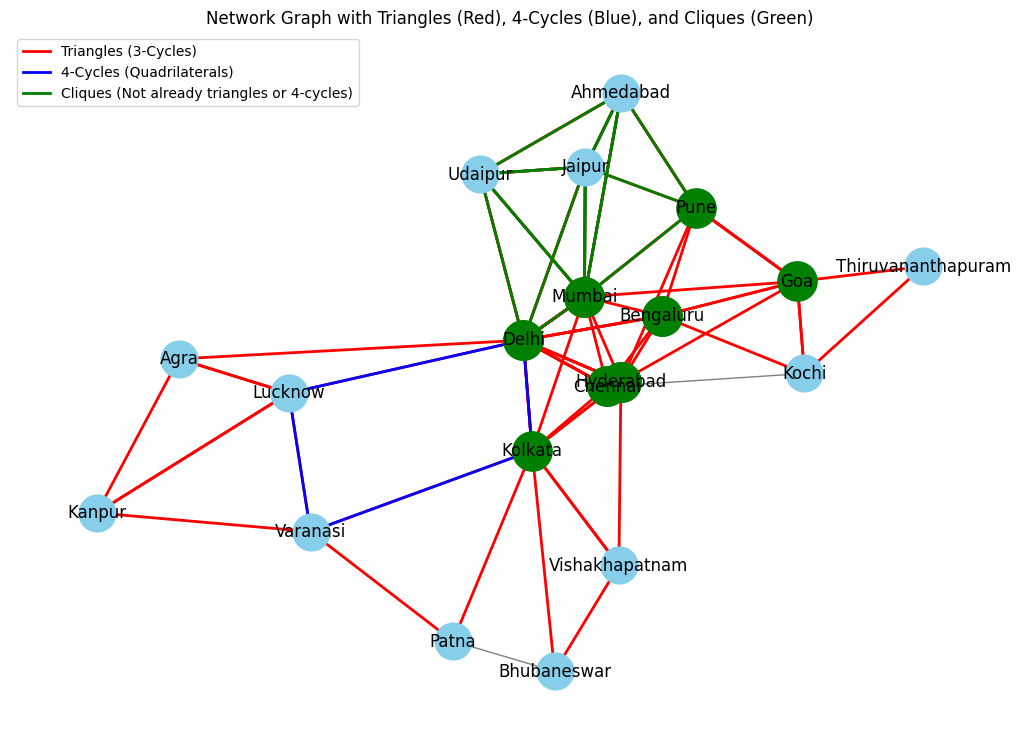

In [ ]:
from matplotlib.lines import Line2D
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 7))

# Draw the basic graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')

# Highlight triangles in red
for triangle in triangles:
    nx.draw_networkx_edges(G, pos, edgelist=[(triangle[i], triangle[(i+1)%3]) for i in range(3)], edge_color='red', width=2)

# Highlight 4-Cycles in blue
for four_cycle in four_cycles:
    nx.draw_networkx_edges(G, pos, edgelist=[(four_cycle[i], four_cycle[(i+1)%4]) for i in range(4)], edge_color='blue', width=2)

# Highlight cliques in green (if they are not triangles or 4-cycles)
for clique in cliques:
    if len(clique) > 4:  # Larger cliques (5 or more nodes)
        nx.draw_networkx_nodes(G, pos, nodelist=clique, node_color='green', node_size=800)
    if len(clique) == 4 and clique not in four_cycles:  # 4-node cliques not in 4-cycles
        nx.draw_networkx_edges(G, pos, edgelist=[(clique[i], clique[j]) for i in range(len(clique)) for j in range(i+1, len(clique))], edge_color='green', width=2)

# Add legend
legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='Triangles (3-Cycles)'),
    Line2D([0], [0], color='blue', lw=2, label='4-Cycles (Quadrilaterals)'),
    Line2D([0], [0], color='green', lw=2, label='Cliques (Not already triangles or 4-cycles)'),
]

plt.legend(handles=legend_elements, loc='upper left')
plt.title("Network Graph with Triangles (Red), 4-Cycles (Blue), and Cliques (Green)")
plt.show()

## **Conclusion**

The network graph visually represents relationships between cities, highlighting triangles (3-cycles), 4-cycles (quadrilaterals), and cliques (sets of nodes fully connected to each other that are not already part of triangles or 4-cycles). Here’s a breakdown of what each color and shape indicates:

1. **Red Edges (Triangles or 3-Cycles):**
   - These red lines connect sets of three cities, forming a triangle. Each set of cities connected by red edges represents a closed loop of three cities where each city is directly connected to the other two.

2. **Blue Edges (4-Cycles or Quadrilaterals):**
   - Blue edges indicate 4-cycles, which are sets of four cities forming a quadrilateral. In these cycles, each city is connected to two others, forming a closed loop with four nodes.

3. **Green Edges (Cliques):**
   - Green edges represent cliques, which are groups of cities that are fully connected, meaning every city in the group is directly connected to every other city in the group. These cliques do not form triangles or quadrilaterals.

4. **Node Colors:**
   - The nodes (cities) themselves are colored based on their participation in the various structures:
     - **Dark Green:** These cities are involved in cliques.
     - **Light Blue:** These cities are part of triangles or quadrilaterals.

5. **Node Size:**
   - The size of the nodes varies, likely indicating the degree (number of connections) of each city in the network. Larger nodes have more connections.

6. **Labeling:**
   - Each city is labeled, allowing you to identify which cities are part of which structures. For instance, Delhi, Mumbai, and Bengaluru are part of a clique (green edges), while cities like Agra, Kanpur, and Lucknow form a triangle (red edges).

### Interpretation:
- Cities like Delhi, Mumbai, and Pune are highly connected, forming cliques and being part of multiple triangles.
- Peripheral cities like Thiruvananthapuram and Kochi are less connected, participating only in simpler structures like 4-cycles or triangles.

